In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

sns.set_style('whitegrid')

## Universidade Federal Da Paraíba 

## Relatório de Introdução a Ciência de Dados 

## Análise dos Filmes e das Séries de TV da Netflix

### Alunos:

- Dayvison Gomes de Oliveira 
- Nathan Carlos De Macena Gomes
- Denilson Pedro Coutinho Da Silva

## 1. Introdução

### 1.1 Motivação

$\hspace{1cm}$Este conjunto de dados consiste em Programas de TV e filmes disponíveis na Netflix a partir de 2008. Com os dados presentes nesse dataset é possível responder uma série de perguntas sobre o conjunto de dados, é interessante analisar se a Netflix tem se concentrado cada vez mais nos filmes do que na tv nos últimos anos.

### 1.2 Objetivos da Análise

$\hspace{1cm}$O objetivo deste trabalho é fazer uma melhor análise do conjunto de dados tanto de filmes e de tv shows(programas de tv), fazendo com que compreendemos melhor os dados que estão sendo tratados para tentarmos agrupar em algum método de IA(Inteligência Artificial).

## 2. Dados Usados

$\hspace{1cm}$Foi usado o dataset fornecido pelo kaggle e esse dataset é coletado do Flixable, um mecanismo de busca da Netflix de terceiros https://www.kaggle.com/shivamb/netflix-shows.

As colunas desse dataset são:

- show_id: ID Único para cada Filme / Programa de TV
- type: É Filme ou Programa de TV
- title: Título do Filme / Programa de TV
- director: Diretor / Diretores do Filme / Programa de TV
- cast: O elenco 
- country: País / Países em que o Filme / Programa de TV foi produzido
- date_added: Data em que foi adicionado na Netflix
- release_year: Ano de lançamento 
- rating: Faixa etária 
- duration: Duração em minutos para Filme e temporadas para Programa de TV
- listed_in: Gênero 
- description: Sinopse 

### 2.1 Exploração inicial dos dados 
 
$\hspace{1cm}$Assim que carregamos os dados, mostramos o dataset e depois verificamos se existem dados faltantes, ou seja calculamos a soma de todos os dados faltantes em cada coluna usando o comando no python: 

In [41]:
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [42]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Calculamos também as médidas de dispersão(desvio padrão e variância) e de centralidade(média, moda e mediana) na colunas númericas disponíveis que no caso é a coluna dos anos que foram lançados os filmes e os Programas de TV para entender melhor como esses lançamentos estão distribuídos, por exemplo, com isso dá para saber em que ano teve mais lançamentos. 

In [43]:
print(df['release_year'].mean())   #Média
print(df['release_year'].std())    #Desvio padrão
print(df['release_year'].median()) #Mediana
print(df['release_year'].var())    #Variância
print(df['release_year'].mode())   #Moda

2013.3593198588387
8.811620351521556
2016.0
77.64465321934887
0    2018
dtype: int64


Abaixo temos um boxplot, com ele dá para notar que a maioria dos filmes e programas de tv estão entre 2010 e 2020, e para reforçar isso temos um gráfico de distribuição logo após este.

<AxesSubplot:>

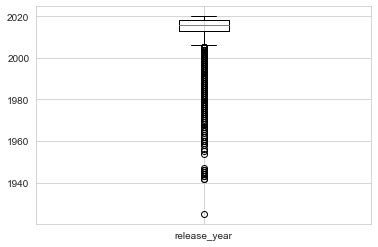

In [44]:
df.boxplot(column=['release_year'])

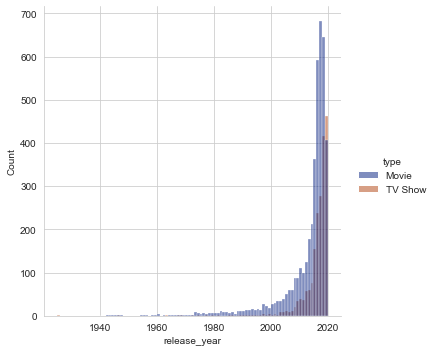

In [45]:
sns.set_palette('dark')
sns.displot(data=df , x='release_year' , binwidth=1 , hue='type')

Construímos gráficos de distribuição, de barras, de linha e assim podemos analisar melhor o dataset, temos aqui um gráfico de barras que diz a quantidade de filmes e Programas de TV.

<AxesSubplot:xlabel='type', ylabel='count'>

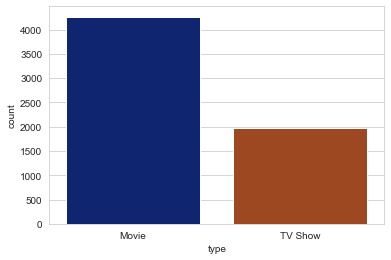

In [46]:
sns.countplot(data=df, x='type')

## 3. Pré-processamento

$\hspace{1cm}$Sabendo que existem dados faltantes, começamos a pensar em como podemos tratá-los, temos 5 colunas com dados faltantes, sendo a do diretor possuindo a maior quantidade de dados faltantes e assim substituindo esses dados por 'Sem Diretor' utilizando o método fillna, sem ter que precisar dar um dropna(Excluir as intâncias com valores faltantes(NaN ou None)), pois algumas instâncias possuiam alguns outros dados porém sem diretor.

In [48]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [49]:
diretor = {'director': 'Sem Diretor'}
df = df.fillna(value=diretor)

Dropamos a coluna show_id poís já possuímos os títulos.

In [50]:
df = df.drop(columns=['show_id'])

Agora dropamos o resto das instâncias com valores faltantes.

In [51]:
df = df.dropna()

Transformamos as datas da coluna date_added, onde estavam em formato de string e utilizando o metódo to_datetime para transformar as datas em um tipo especial do pandas, para assim termos mais controle do ano, mês, dia e hora.

In [52]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'][0]

Timestamp('2019-09-09 00:00:00')

Percebemos que a coluna rating está com a classificação da faixa etária de diferentes países.
Então procuramos e achamos esse site do prime video: <a href='https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=pt_BR&nodeId=GFGQU3WYEG6FSJFJ'> Prime Video Faixa Etária</a> e mudamos para a classificação do Brasil para ficar mais fácil de entender.

In [53]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'NR', 'PG-13',
       'PG', 'TV-Y', 'G', 'TV-G', 'UR', 'NC-17'], dtype=object)

In [56]:
dic = {'TV-PG': '7+' , 'TV-Y7': '7+' , 'TV-Y7-FV': '7+' , 'TV-MA': '18+' , 'TV-14': '16+' , 'R':'18+','TV-Y':'Todos','NR':'18+'
       ,'PG-13':'13+','TV-G':'Todos','PG':'7+','G':'Todos','NC-17':'18+' ,'UR':'Não Classificado'}

In [55]:
df['rating'] = df['rating'].map(dic)

Separamos o data frame original em um data frame para os Filmes e outro para os Programas de TV poís percebemos que a coluna duration tem os filmes que estão em minutos mas em string e os Programas de TV está em temporadas, como vemos abaixo.

In [57]:
df_filmes = df[df['type'] == 'Movie']
df_tvshow = df[df['type'] == 'TV Show']

In [59]:
df[df['type'] == 'TV Show']['duration'].unique()

array(['1 Season', '5 Seasons', '2 Seasons', '3 Seasons', '7 Seasons',
       '4 Seasons', '8 Seasons', '6 Seasons', '9 Seasons', '14 Seasons',
       '10 Seasons', '12 Seasons', '15 Seasons', '11 Seasons',
       '13 Seasons'], dtype=object)

In [60]:
df_filmes['duration'][0] , type(df_filmes['duration'][0])

('90 min', str)

In [20]:
df_filmes['duration'].unique()

array(['90 min', '94 min', '99 min', '110 min', '60 min', '95 min',
       '135 min', '98 min', '96 min', '113 min', '80 min', '112 min',
       '106 min', '102 min', '114 min', '125 min', '133 min', '86 min',
       '146 min', '79 min', '122 min', '126 min', '116 min', '130 min',
       '70 min', '128 min', '88 min', '108 min', '93 min', '64 min',
       '107 min', '111 min', '103 min', '72 min', '89 min', '127 min',
       '163 min', '104 min', '75 min', '82 min', '97 min', '91 min',
       '58 min', '152 min', '87 min', '78 min', '121 min', '101 min',
       '119 min', '83 min', '182 min', '124 min', '63 min', '24 min',
       '139 min', '171 min', '84 min', '62 min', '76 min', '92 min',
       '153 min', '141 min', '117 min', '100 min', '137 min', '132 min',
       '157 min', '109 min', '65 min', '105 min', '71 min', '123 min',
       '67 min', '140 min', '138 min', '149 min', '47 min', '148 min',
       '151 min', '155 min', '162 min', '85 min', '160 min', '29 min',
       '57 min

Abaixo pegamos o data frame que possui apenas os Filmes e assim transformamos as strings em números inteiros, fizemos isso pois a coluna duration dos Programas de TV está em Seasons (Temporadas) e assim não temos um tempo certo.

In [61]:
df_filmes['duration'] = df_filmes['duration'].apply(lambda x: int(x.split(' ')[0]))

c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_filmes['duration'].unique()

array([ 90,  94,  99, 110,  60,  95, 135,  98,  96, 113,  80, 112, 106,
       102, 114, 125, 133,  86, 146,  79, 122, 126, 116, 130,  70, 128,
        88, 108,  93,  64, 107, 111, 103,  72,  89, 127, 163, 104,  75,
        82,  97,  91,  58, 152,  87,  78, 121, 101, 119,  83, 182, 124,
        63,  24, 139, 171,  84,  62,  76,  92, 153, 141, 117, 100, 137,
       132, 157, 109,  65, 105,  71, 123,  67, 140, 138, 149,  47, 148,
       151, 155, 162,  85, 160,  29,  57,  46,  73,  74,  25, 118,  66,
        20,  81,  77, 115, 168,  68,  52, 144, 161,  56,  51, 205, 131,
        59, 150, 159, 145, 158, 143,  45, 147, 129, 154,  61, 142, 214,
       136, 134,  44, 156,  23,  30, 120, 209,  28, 166,  69,  40,  54,
       200, 185,  53, 165, 164, 177,  18,  42,  41, 170, 187, 173,  12,
       176,  15,  55,  32,  14,  26,  48,  22,  49, 189, 201, 179, 191,
       193, 192,  43,  50,  38, 172, 224,  27, 178, 228, 312, 174, 169,
        31, 180, 196, 167,  33, 203, 195], dtype=int64)

Com essas mudanças, conseguimos ver a quantidade de Filmes e Programas de TV para diferentes faixas etárias.

<AxesSubplot:xlabel='rating', ylabel='count'>

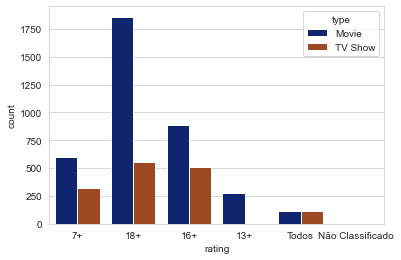

In [63]:
sns.countplot(data=df, x='rating' , hue='type')

Após mudarmos a coluna rating, conseguimos olhar sua média, desvio padrão, mediana, variância e moda, sendo 18+ a classificação que mais aparece como vimos no gráfico acima e após no boxplot .

In [64]:
print(df['rating'].value_counts().mean())   #Média
print(df['rating'].value_counts().std())    #Desvio Padrão
print(df['rating'].value_counts().median()) #Mediana
print(df['rating'].value_counts().var())    #Variância
print(df['rating'].mode())                  #Moda

876.0
914.1748191675375
600.0
835715.6
0    18+
dtype: object


In [65]:
df['rating'].value_counts()

18+                 2418
16+                 1398
7+                   922
13+                  278
Todos                233
Não Classificado       7
Name: rating, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21cb5816108>,
 'caps': [<matplotlib.lines.Line2D at 0x21cb583da88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cb5837d08>],
 'medians': [<matplotlib.lines.Line2D at 0x21cb5842f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cb58429c8>],
 'means': []}

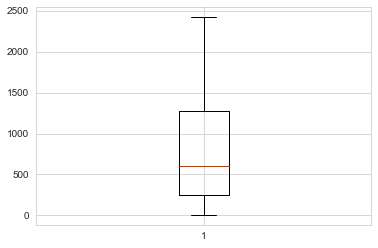

In [66]:
plt.boxplot(df['rating'].value_counts())

Após essas mudanças, conseguimos plotar mais gráficos, contudo apenas para os Filmes, por exemplo o gráfico de dispersão.

<AxesSubplot:xlabel='release_year', ylabel='duration'>

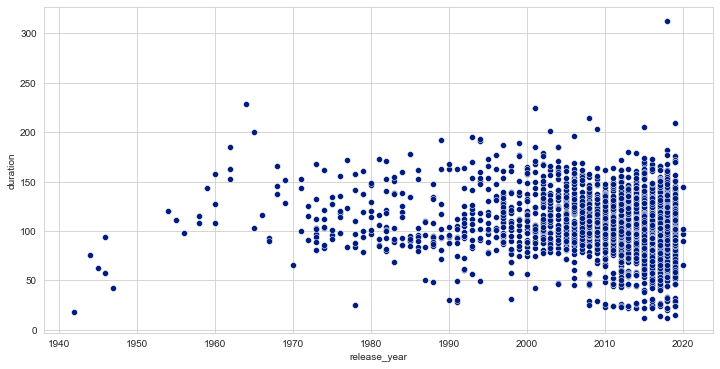

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filmes , x='release_year' , y='duration')

Temos também o gráfico de linha em que temos uma relação entre o ano de lançamento e a duração dos Filmes, notemos que com o passar dos anos, os Filmes tendem a ficar próximos da média de duração.

In [68]:
df_filmes['duration'].mean()

101.9112

<AxesSubplot:xlabel='release_year', ylabel='duration'>

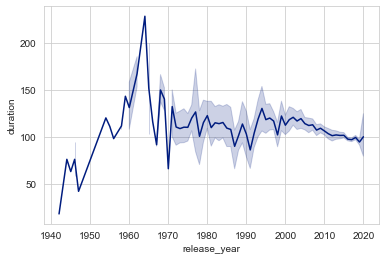

In [69]:
sns.lineplot(data=df_filmes, x='release_year' , y='duration')

E com o boxplot abaixo, vimos que a maioria se concentra próxima da média, e aquela instância acima dos 300 minutos é um dado real.

<AxesSubplot:>

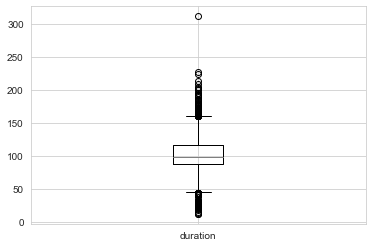

In [70]:
df_filmes.boxplot(column=['duration'])

## 4. Perguntas

Qual diretor ou diretores dirigiram mais filmes?

Para isso só precisamos pegar a coluna director e utilizar o value_counts, que te retorna uma series que mostra a quantidade de Filmes que um diretor ou mais produziram, usamos o index para pegar a string que representa o(s) diretor(es), sendo que o primeiro indíce é 'Sem Diretor' e então colocamos 1. 

In [72]:
df_filmes['director'].value_counts().index[1] # Colocamos index[1] poís 'Sem Diretor' está em muitas instâncias

'Raúl Campos, Jan Suter'

Qual faixa etária possui mais filmes?

Pegando a coluna rating dos Filmes e utilizando o value_counts, temos a quantidade de filmes para diferentes faixas etárias.

In [32]:
df_filmes['rating'].value_counts()

18+                 1860
16+                  891
7+                   596
13+                  278
Todos                118
Não Classificado       7
Name: rating, dtype: int64

Quais filmes com categoria 'Não Classificados' existem?

Para isso pegamos os indíces em que o rating é igual a 'Não Classificado' e assim utilizamos o loc para podermos visulizar os Filmes.

In [33]:
indices = [df_filmes[df_filmes['rating'] == 'Não Classificado'].index[i]  for i in range(len(df_filmes[df_filmes['rating'] == 'Não Classificado']))]
df_filmes['title'].loc[indices]

332     You Don't Mess with the Zohan
799                   Good Luck Chuck
1754          Shootout at Lokhandwala
2461                    Immoral Tales
3029                         Sex Doll
3441                         Aquarius
4436                       White Girl
Name: title, dtype: object

Qual a quantidade de filmes em média que a duração deles é próxima de 100 minutos?

Utilizamos o KMeans para responder essa pergunta.

In [34]:
# Para responder essa pergunta, usamos o kmeans apenas com a coluna duration no qual mostra a duração dos filmes
kmeans = KMeans(n_clusters=3)
x = np.array(df_filmes['duration']).reshape(-1,1)
kmeans.fit(x)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='release_year', ylabel='duration'>

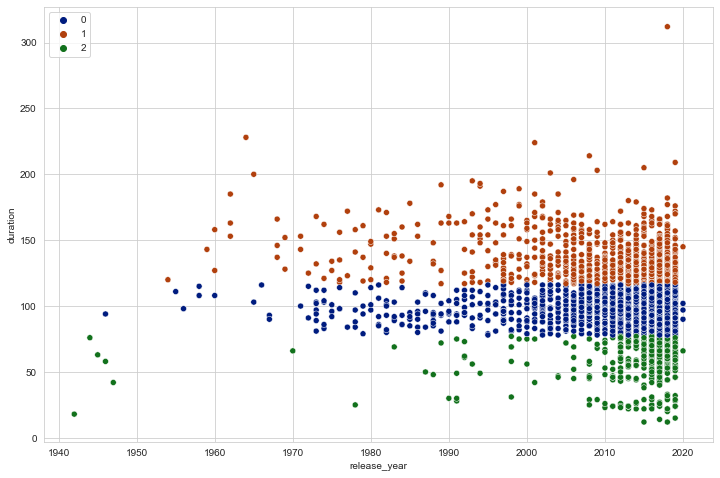

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_filmes , x='release_year' , y='duration' , hue=kmeans.labels_, palette='dark')

In [36]:
print(df_filmes[kmeans.labels_ == 0]['duration'].value_counts().sum())

2290


Qual país tem mais filmes que foram lançados exclusivamente para esse país que possuem a duração entre 60 minutos e 120 minutos?

Apenas limitamos a duration, para ficar entre 60 e 120 minutos e depois utilizamos o value_counts para ter a nossa resposta.

In [37]:
df_país = df_filmes[df_filmes['duration']  >= 60]
df_país[df_país['duration'] <= 120]['country'].value_counts()

United States                           1098
India                                    259
United Kingdom                           106
Canada                                    68
Spain                                     62
                                        ... 
Ghana, United States                       1
Spain, Colombia                            1
South Africa, United States, Germany       1
Thailand, Canada, United States            1
United Kingdom, New Zealand                1
Name: country, Length: 372, dtype: int64

Qual filme possui a maior duração e qual o seu país?

Nós limitamos a duration para acima dos 300 minutos.

In [38]:
df_filmes[df_filmes['duration']  >= 300]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4315,Movie,Black Mirror: Bandersnatch,Sem Diretor,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,18+,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


## Conclusão

$\hspace{1cm}$Percebemos que a Netflix atualmente está focando mais em Filmes do que em Programas de TV nos últimos anos e junto a isso foi percebido também que ao longo dos anos as durações dos Filmes está proxima da média que é 101 minutos, além disso mostramos que a duração deles estão próximas da média.

$\hspace{1cm}$Encontramos diversas limitações durante o desenvolvimento do projeto, esse dataset praticamente não tem muitas colunas númericas o que dificultou o uso de alguns métodos de IA, por exemplo a regressão linear, temos também que os Programas de TV estão em temporadas, então não conseguimos saber sua duração e além disso temos poucas instâncias, contudo conseguimos construir gráficos interessantes mesmo com a falta de colunas númericas e conseguimos extrair boas informações.

$\hspace{1cm}$Uma melhoria que poderiamos fazer seria integrar este conjunto de dados com outros conjuntos de dados externos, como avaliações IMDB, e o rotten tomatoes que também pode fornecer muitas descobertas interessantes.